In [2]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import json
#import seaborn as sns
import numpy as np
import os
import re
import seaborn as sns
from inference import Estimator
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm as cm
import importlib
import matplotlib.patches as mpatches
import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm
#import cld2

[2024-01-24 03:01:04,689] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
len(statements)

25

In [4]:
statements = [
'My social media feed', 'General public', 'News story is interesting to me', 'Tackles an important issue', "Shouldn't be public outside science", 'Would share on wider forum', 'News story is fun to read', 'Finding is surprising to me', 'Sci-Tech media', 'Other popular media', 'Policy makers', 'Should be published in news', 'Could benefit many people', 'Related industry companies', 'Finding could be controversial', 'I understand the news story', 'Needs specialized knowledge', 'Unlikely to share', 'Could interest the general public', 'I learned something useful', 'A public segment', 'News story is exaggerated', 'Popular print media', 'Would share directly', 'General news outlets']
statements = [it.replace(' ','_').replace('\'','').replace('-','_') for it in statements]
def get_news_values(texts, model='roberta-large-seeds'):
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
    os.environ["CUDA_VISIBLE_DEVICES"]="2"
    model = Estimator(tokenizer='roberta-large', model='../models/src/new_model/%s/0/best_model'%model,num_labels=len(statements),cuda = False)
    predictions = model.predict(texts)
    res_dict = {}
    for i,s in enumerate(statements):
        res_dict[s] = [it[i] for it in predictions]
        
    return res_dict
def num2cat(num):
    if num < 10:
        return '0' + str(int(num))
    if num <= 15:
        return str(int(num))
    elif num <= 20:
        return '>15'
    #elif num <= 30:
    #    return '21-30'
    else:
        return '>20'

In [5]:
df = pd.read_csv('../data/unique_df.csv')

In [6]:
df['body_len'] = [len(str(it).split()) for it in df.cleaned_text]
df['cleaned_text'] = df['cleaned_text'].astype(str)

In [8]:
res_dict = get_news_values(list(df['cleaned_text']), 'roberta-large-seeds-sci_reader_sore')
for it in res_dict:
    df['sci_'+it] = res_dict[it]

0it [00:00, ?it/s]

start tokenizing 125685 lines of text


/opt/anaconda/lib/python3.9/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
/opt/anaconda/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


1it [08:04, 484.99s/it]


In [9]:
res_dict = get_news_values(list(df['cleaned_text']), 'roberta-large-seeds-nonsci_reader_sore')
for it in res_dict:
    df['nonsci_'+it] = res_dict[it]

0it [00:00, ?it/s]

start tokenizing 125685 lines of text


/opt/anaconda/lib/python3.9/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
/opt/anaconda/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


1it [05:23, 323.19s/it]


In [180]:
#for it in res_dict:
#    df[it.replace(' ', '_').replace('\'','').replace('-','_')] = res_dict[it]

In [11]:
df.to_csv('../data/unique_df_with_separate_scores.csv', index=False)

In [54]:
df[['Mention title','outlet','Tackles an important issue']].sort_values('Tackles an important issue')

,Mention title,outlet,Tackles an important issue
17510,"Body image isn't just a 'girl thing,' boys suf...",TODAY,1.423305
82834,Breastfeeding Not Just for Women Anymore,Guardian Liberty Voice,1.454912
110232,"Moms with These 3 Healthy Habits Live Longer, ...",Healthline,1.470033
62444,The Link Between Hay Fever & Mental Health,She Knows,1.478377
58099,7 Self-Care Tips That Will Make You Happier Th...,Health,1.485399
...,...,...,...
22309,Notre voix serait déterminée avant même de com...,National Geographic,3.335549
19289,Esta mujer prohibe entrar con zapatos a su cas...,Women's Health,3.340598
65065,Improving mask metrology for semiconductor man...,SPIE Newsroom,3.351637
29548,Cinco consejos básicos de nutrición si entrena...,Women's Health,3.482139


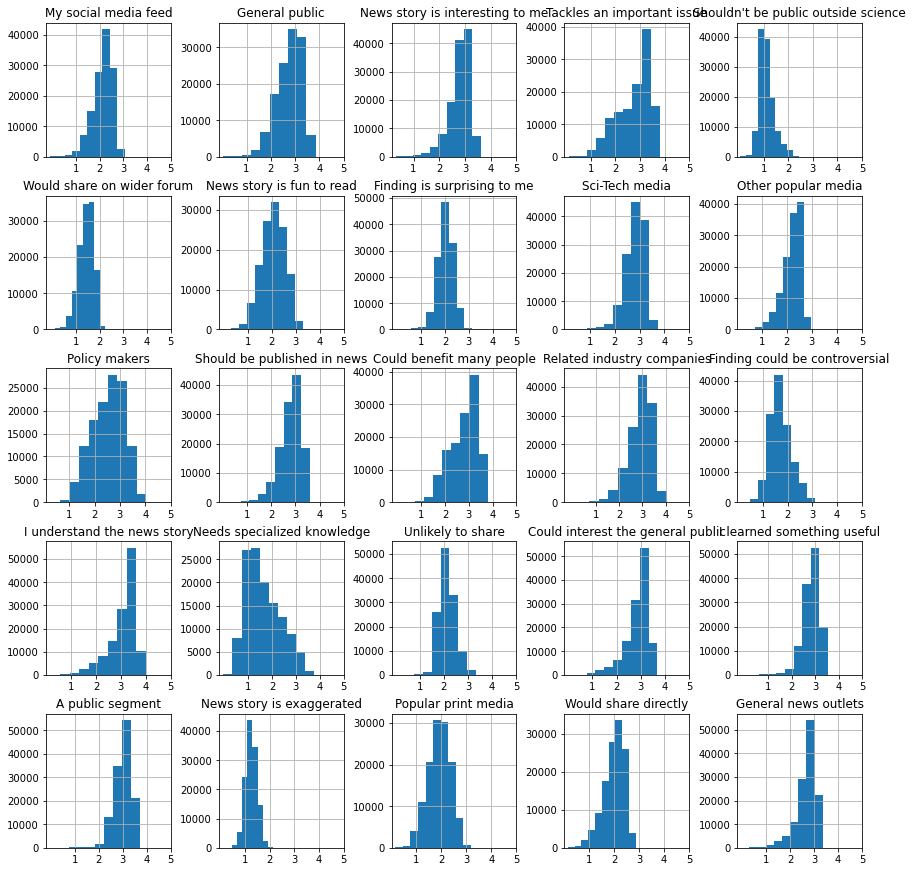

In [83]:
fig, axes = plt.subplots(ncols=5, nrows=5,figsize=(12,12), constrained_layout=True)
#fig.tight_layout()
for i in range(5):
    for j in range(5):
        ax = axes[i][j]
        s = statements[i*5+j]
        df[s].hist(ax=ax)
        ax.set_title(s)
        ax.set_xticks([1,2,3,4,5])
        #sns.histplot(list(df[statements[i*5+j]]),ax=axes[i][j])
    #axes[i].set_xticks([0,10,20,30,40,50])"

In [200]:
np.percentile(df['Should be published in news'], 5)

1.95215904712677

In [15]:
def get_heatmap(key, prefix=''):
    fig, ax = plt.subplots(figsize=(7,8)) 
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df[(df['mention_year']>=2013)&(df['big_field']!='Humanities')][[prefix + s for s in statements] + [key]].groupby(key).mean().transpose(), cmap=cmap, annot=True)

In [205]:
df['original_pr']

0                                                       NaN
1                                                       NaN
2         ['New research links the number of social medi...
3                                                       NaN
4                                                       NaN
                                ...                        
125680                                                  NaN
125681                                                  NaN
125682                                                  NaN
125683    ['A recent study published in the journal Nutr...
125684    ['A recent study published in the journal Nutr...
Name: original_pr, Length: 125685, dtype: object

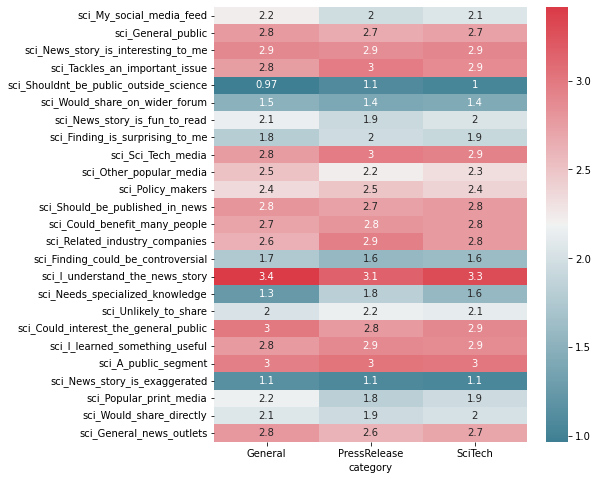

In [17]:
get_heatmap('category', 'sci_')

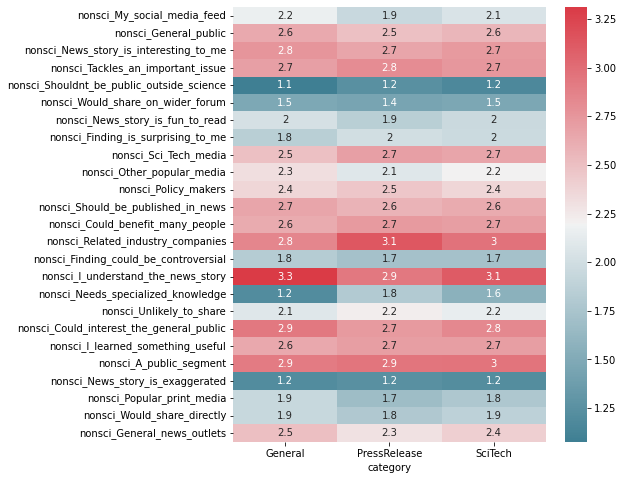

In [18]:
get_heatmap('category', 'nonsci_')

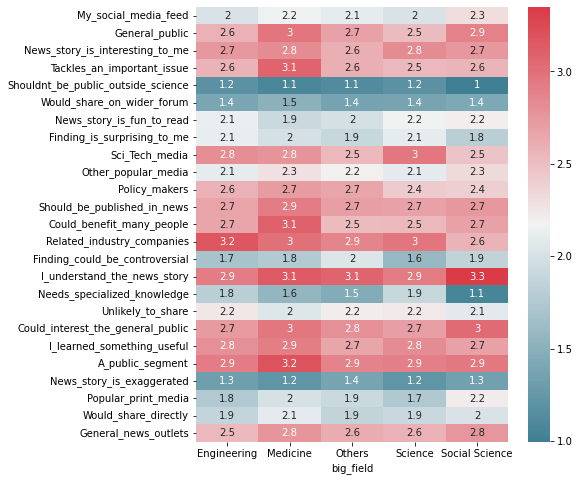

In [203]:
get_heatmap('big_field')

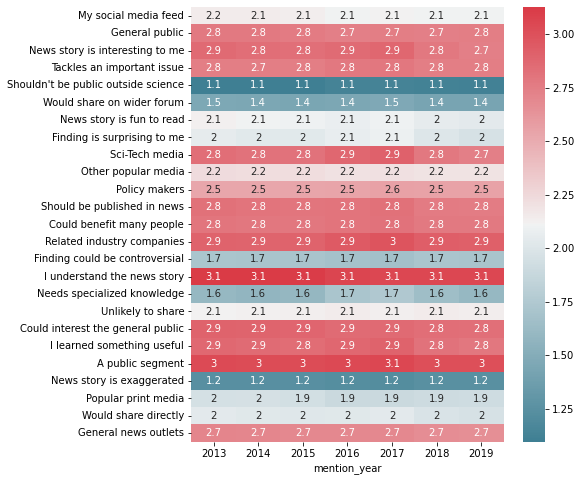

In [97]:
get_heatmap('mention_year')

In [130]:
df['journal_impact_cat'] = [num2cat(it) if str(it) != 'nan' else None for it in list(df['journal_impact'])]

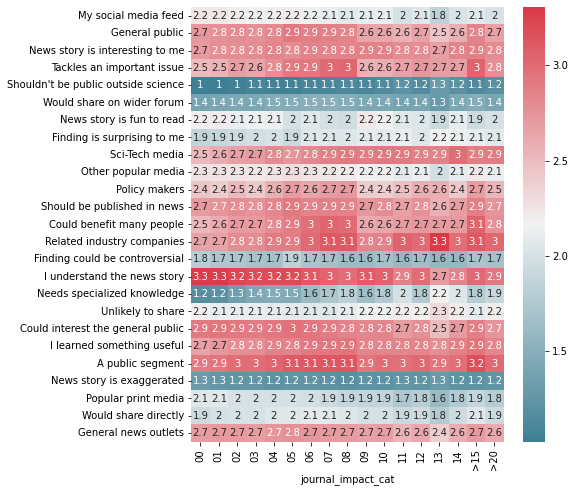

In [131]:
get_heatmap('journal_impact_cat')

In [138]:
key = 'News story is interesting to me'#, 'Tackles an important issue'
df['tgt'] = df[key]
mod = ols(formula = 'tgt' + ' ~ category + big_field + journal_impact_cat',
                      data=df)
res = mod.fit()
print(res.summary())
#res_df =  results_summary_to_dataframe(res)

                            OLS Regression Results                            
Dep. Variable:                    tgt   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     85.46
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:16:58   Log-Likelihood:                -49271.
No. Observations:               98060   AIC:                         9.859e+04
Df Residuals:                   98036   BIC:                         9.882e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [139]:
key = 'Tackles an important issue'
df['tgt'] = df[key]
mod = ols(formula = 'tgt' + ' ~ category + big_field + journal_impact_cat',
                      data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    tgt   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     879.9
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:20:13   Log-Likelihood:                -91059.
No. Observations:               98060   AIC:                         1.822e+05
Df Residuals:                   98036   BIC:                         1.824e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [173]:
top_outlets = set(df.outlet.value_counts().reset_index()['outlet'][:40])
df['top_outlet'] = [it if it in top_outlets else 'Others' for it in df.outlet]

In [174]:
top_journals = set(df.top_journal.value_counts().reset_index()['top_journal'][:40])
df['top_journal_re'] = [it if it in top_journals else 'Others' for it in df.top_journal]

<AxesSubplot:xlabel='General public', ylabel='coverage_cnt'>

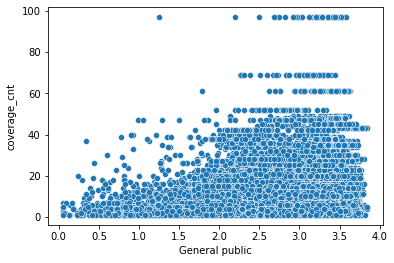

In [217]:
sns.scatterplot(y='coverage_cnt', x='General public', data=df)

In [24]:
df['coverage_cnt'].corr(df['sci_General_public']), df['coverage_cnt'].corr(df['nonsci_General_public'])

(0.10468662921873459, 0.0984788278789589)

In [36]:
sel_statements = {'Tackles an important issue':'Importance', 'Should be published in news':'Newsworthiness', 
                  'I understand the news story':'Understandability', 'Could benefit many people':'Benefits', 
                  'Could interest the general public':'Interestingness', 'News story is fun to read':'Fun'}

<ipython-input-54-cf16d2375ac8>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='corr', y='statement', hue='type', data=t_df.sort_values('corr'), join=False)


<Axes: xlabel='corr', ylabel='statement'>

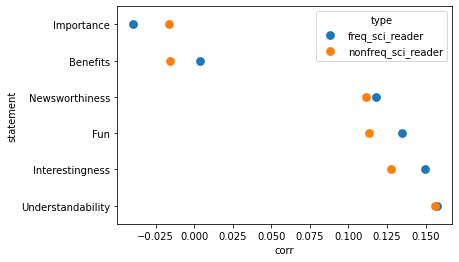

In [54]:
t_df = defaultdict(list)
for s in sel_statements:
    s = s.replace(' ','_')
    #print(s, df['coverage_cnt'].corr(df['sci_%s'%s]), df['coverage_cnt'].corr(df['nonsci_%s'%s]))
    t_df['statement'].append(sel_statements[s.replace('_',' ')])
    t_df['statement'].append(sel_statements[s.replace('_',' ')])
    t_df['corr'].append(df['coverage_cnt'].corr(df['sci_%s'%s]))
    t_df['corr'].append(df['coverage_cnt'].corr(df['nonsci_%s'%s]))
    t_df['type'].append('freq_sci_reader')
    t_df['type'].append('nonfreq_sci_reader')
    #t_df['freq_sci_reader'].append(df['coverage_cnt'].corr(df['sci_%s'%s]))
    #t_df['nonfreq_sci_reader'].append(df['coverage_cnt'].corr(df['nonsci_%s'%s]))
t_df = pd.DataFrame(t_df)
sns.pointplot(x='corr', y='statement', hue='type', data=t_df.sort_values('corr'), join=False)

<ipython-input-34-7ffe8ea5ebc9>:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='corr', y='statement', hue='type', data=t_df.sort_values('corr'), join=False)


<Axes: xlabel='corr', ylabel='statement'>

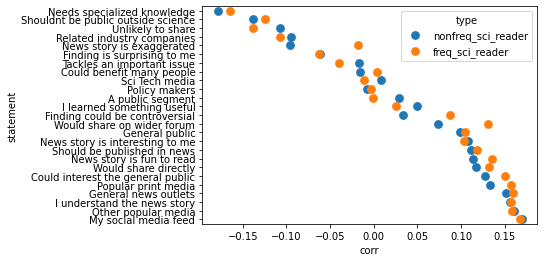

In [34]:
sns.pointplot(x='corr', y='statement', hue='type', data=t_df.sort_values('corr'), join=False)

In [44]:
with open('../data/doi_to_tweet_metrics.json') as f:
    doi2tm = json.load(f)

In [59]:
df['tweet_cnt'] = [len(doi2tm[doi]['twitter_retweets']) if doi in doi2tm and 'twitter_retweets' in doi2tm[doi] else None for doi in df['doi']] 
df['retweet_cnt'] = [sum(doi2tm[doi]['twitter_retweets']) if doi in doi2tm and 'twitter_retweets' in doi2tm[doi] else None for doi in df['doi']] 
df['likes_cnt'] = [sum(doi2tm[doi]['twitter_likes']) if doi in doi2tm and 'twitter_likes' in doi2tm[doi] else None for doi in df['doi']] 

<ipython-input-60-d57ddabe251a>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='corr', y='statement', hue='type', data=t_df.sort_values('corr'), join=False)


<Axes: xlabel='corr', ylabel='statement'>

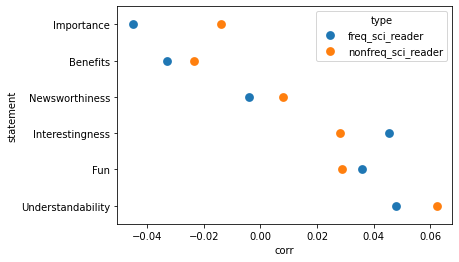

In [60]:
t_df = defaultdict(list)
for s in sel_statements:
    s = s.replace(' ','_')
    #print(s, df['coverage_cnt'].corr(df['sci_%s'%s]), df['coverage_cnt'].corr(df['nonsci_%s'%s]))
    t_df['statement'].append(sel_statements[s.replace('_',' ')])
    t_df['statement'].append(sel_statements[s.replace('_',' ')])
    t_df['corr'].append(df['likes_cnt'].corr(df['sci_%s'%s]))
    t_df['corr'].append(df['likes_cnt'].corr(df['nonsci_%s'%s]))
    t_df['type'].append('freq_sci_reader')
    t_df['type'].append('nonfreq_sci_reader')
    #t_df['freq_sci_reader'].append(df['coverage_cnt'].corr(df['sci_%s'%s]))
    #t_df['nonfreq_sci_reader'].append(df['coverage_cnt'].corr(df['nonsci_%s'%s]))
t_df = pd.DataFrame(t_df)
sns.pointplot(x='corr', y='statement', hue='type', data=t_df.sort_values('corr'), join=False)

<Axes: xlabel='sci_General_public', ylabel='tweet_cnt'>

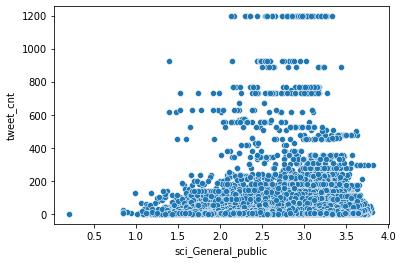

In [52]:
sns.scatterplot(y='tweet_cnt', x='sci_General_public', data=df)

<Axes: xlabel='nonsci_General_public', ylabel='tweet_cnt'>

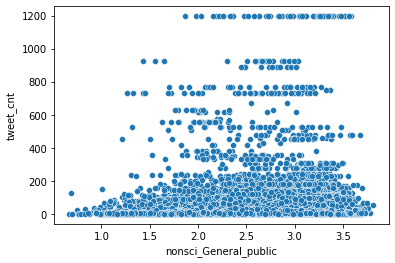

In [53]:
sns.scatterplot(y='tweet_cnt', x='nonsci_General_public', data=df)

<Axes: xlabel='sci_General_public', ylabel='coverage_cnt'>

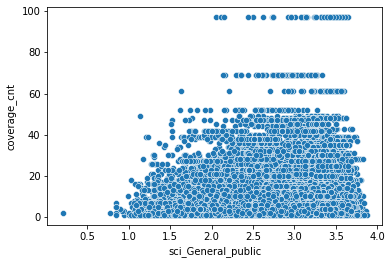

In [20]:
sns.scatterplot(y='coverage_cnt', x='sci_General_public', data=df)

<Axes: xlabel='nonsci_General_public', ylabel='coverage_cnt'>

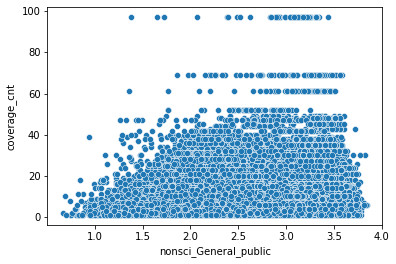

In [21]:
sns.scatterplot(y='coverage_cnt', x='nonsci_General_public', data=df)

In [206]:
statements

['My_social_media_feed',
 'General_public',
 'News_story_is_interesting_to_me',
 'Tackles_an_important_issue',
 'Shouldnt_be_public_outside_science',
 'Would_share_on_wider_forum',
 'News_story_is_fun_to_read',
 'Finding_is_surprising_to_me',
 'Sci_Tech_media',
 'Other_popular_media',
 'Policy_makers',
 'Should_be_published_in_news',
 'Could_benefit_many_people',
 'Related_industry_companies',
 'Finding_could_be_controversial',
 'I_understand_the_news_story',
 'Needs_specialized_knowledge',
 'Unlikely_to_share',
 'Could_interest_the_general_public',
 'I_learned_something_useful',
 'A_public_segment',
 'News_story_is_exaggerated',
 'Popular_print_media',
 'Would_share_directly',
 'General_news_outlets']

In [210]:
key = 'Could interest the general public'
df['tgt'] = df[key]
mod = ols(formula = 'tgt' + ' ~ category + I_understand_the_news_story + big_field + journal_impact_cat',
                      data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    tgt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.121e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:56:22   Log-Likelihood:                 22213.
No. Observations:               98060   AIC:                        -4.438e+04
Df Residuals:                   98035   BIC:                        -4.414e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [211]:
key = 'Could interest the general public'
df['tgt'] = df[key]
mod = ols(formula = 'tgt' + ' ~ category + big_field + journal_impact_cat',
                      data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    tgt   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     654.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:56:33   Log-Likelihood:                -60183.
No. Observations:               98060   AIC:                         1.204e+05
Df Residuals:                   98036   BIC:                         1.206e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [188]:
statements

['My_social_media_feed',
 'General_public',
 'News_story_is_interesting_to_me',
 'Tackles_an_important_issue',
 'Shouldnt_be_public_outside_science',
 'Would_share_on_wider_forum',
 'News_story_is_fun_to_read',
 'Finding_is_surprising_to_me',
 'Sci_Tech_media',
 'Other_popular_media',
 'Policy_makers',
 'Should_be_published_in_news',
 'Could_benefit_many_people',
 'Related_industry_companies',
 'Finding_could_be_controversial',
 'I_understand_the_news_story',
 'Needs_specialized_knowledge',
 'Unlikely_to_share',
 'Could_interest_the_general_public',
 'I_learned_something_useful',
 'A_public_segment',
 'News_story_is_exaggerated',
 'Popular_print_media',
 'Would_share_directly',
 'General_news_outlets']

In [212]:
mod = ols(formula = 'coverage_cnt' + ' ~ big_field + journal_impact_cat'# + '+'.join(statements)
          ,data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           coverage_cnt   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     290.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:01:46   Log-Likelihood:            -3.4302e+05
No. Observations:              101989   AIC:                         6.861e+05
Df Residuals:                  101967   BIC:                         6.863e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         